In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('similar_questions.csv')

In [4]:
data.head()

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [5]:
data.shape

(404290, 6)

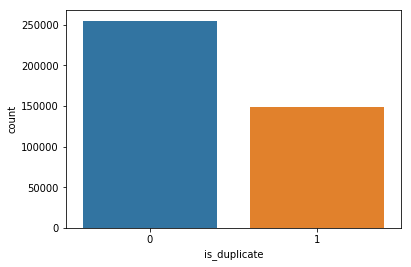

In [6]:
sns.countplot(data['is_duplicate'])
plt.show()

In [9]:
data['question1'][0] ### not same

'What is the step by step guide to invest in share market in india?'

In [10]:
data['question2'][0] ### not same

'What is the step by step guide to invest in share market?'

In [12]:
data['question1'][5] ### same

'Astrology: I am a Capricorn Sun Cap moon and cap rising...what does that say about me?'

In [13]:
data['question2'][5] ### same

"I'm a triple Capricorn (Sun, Moon and ascendant in Capricorn) What does this say about me?"

In [14]:
data['question1'][7] ### same

'How can I be a good geologist?'

In [15]:
data['question2'][7] ### same

'What should I do to be a great geologist?'

In [25]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       1
question2       2
is_duplicate    0
dtype: int64

In [26]:
data.dropna(inplace=True)

In [27]:
data.isnull().sum()

id              0
qid1            0
qid2            0
question1       0
question2       0
is_duplicate    0
dtype: int64

In [50]:
data[data.duplicated()]

,id,qid1,qid2,question1,question2,is_duplicate


In [52]:
data = data.loc[:50000,:]

In [53]:
df = data.drop(['id','qid1','qid2'],axis=1)

In [54]:
df.sample(10)

,question1,question2,is_duplicate
8959,What are the ways to commit suicide?,Is there some painless way to suicide?,1
1452,How do you view the Indian government's decisi...,What are going to be the rammifications of the...,1
10230,How do I know if my WhatsApp account has been ...,How do you know if your site has been hacked?,0
18522,What are some differences between dynasty warr...,Is Dynasty Warriors 7 available in India?,0
17412,Which is the best to buy LG or Samsung top loa...,Which is better? Top loading washing machine o...,0
14890,If Navajo Code Talkers were used in the 21st c...,What made the Navajo code talkers so integral ...,0
1334,What would Cersei do if Jon became king?,What would Melisandre do if Jon became king?,0
1770,How can I get butts like these guys shown below?,"How do I get a bigger butt, naturally?",0
24260,What is the best way to reheat a Domino's Pizz...,What is the best way to grill frozen pizza?,0
5506,What is the best way to learn everything in a ...,What is the best way to learn a textbook?,1


In [55]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\k.vidya\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [56]:
x = df.drop('is_duplicate',axis=1)

In [57]:
x.head()

,question1,question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?


In [58]:
y = df[['is_duplicate']]

In [59]:
y.head()

,is_duplicate
0,0
1,0
2,0
3,0
4,0


In [60]:
from sklearn.feature_extraction.text import TfidfVectorizer
import re

In [61]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
stopwords = stopwords.words('english')

In [62]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\k.vidya\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [63]:
def cleaning_text(text):
    corpus=[]
    sentences=nltk.sent_tokenize(text)
    for i in range(len(sentences)):
        text=re.sub('[^a-zA-Z0-9]'," ",sentences[i])
        text=text.lower()
        words=text.split()
        words=[lemmatizer.lemmatize(word) for word in words if not word in stopwords]
        
        return ' '.join(words)

In [64]:
x['cleaned_question1'] = x['question1'].apply(cleaning_text)

In [65]:
x['cleaned_question2'] = x['question2'].apply(cleaning_text)

In [66]:
x.head()

,question1,question2,cleaned_question1,cleaned_question2
0,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,step step guide invest share market india,step step guide invest share market
1,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...
2,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,increase speed internet connection using vpn,internet speed increased hacking dns
3,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,mentally lonely,find remainder math 23 24 math divided 24 23
4,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,one dissolve water quikly sugar salt methane c...,fish would survive salt water


In [67]:
x.drop(['question1','question2'],axis=1,inplace=True)

In [68]:
x.head()

,cleaned_question1,cleaned_question2
0,step step guide invest share market india,step step guide invest share market
1,story kohinoor koh noor diamond,would happen indian government stole kohinoor ...
2,increase speed internet connection using vpn,internet speed increased hacking dns
3,mentally lonely,find remainder math 23 24 math divided 24 23
4,one dissolve water quikly sugar salt methane c...,fish would survive salt water


In [69]:
questions = list(x['cleaned_question1']) + list(x['cleaned_question2'])

tfidf_v=TfidfVectorizer(max_features=1000,ngram_range=(1,3))

q1_arr,q2_arr = np.vsplit(tfidf_v.fit_transform(questions).toarray(),2)

In [70]:
temp_df1 = pd.DataFrame(q1_arr,index=x.index)
temp_df2 = pd.DataFrame(q2_arr,index=x.index)
temp_df = pd.concat([temp_df1,temp_df2],axis=1)
temp_df.shape

(50001, 2000)

In [71]:
temp_df['is_duplicate'] = y

In [72]:
temp_df.head()

,0,1,2,3,4,5,6,7,8,9,...,991,992,993,994,995,996,997,998,999,is_duplicate
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [73]:
temp_df.shape

(50001, 2001)

In [76]:
x = temp_df.drop('is_duplicate',axis=1)
y = temp_df[['is_duplicate']]

In [77]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [78]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(40000, 2000)
(10001, 2000)
(40000, 1)
(10001, 1)


In [81]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=50)
model.fit(x_train,y_train.values.ravel())

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [83]:
y_pred = model.predict(x_test)

In [84]:
from sklearn.metrics import accuracy_score,confusion_matrix
acc = accuracy_score(y_test,y_pred)
print(f"accuracy of the model is : {acc}")

accuracy of the model is : 0.7274272572742726


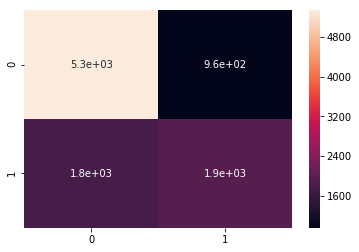

In [85]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)
plt.show()